# Importing Important Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn Modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [4]:
geography  = pd.get_dummies(X["Geography"],drop_first= True)
gender = pd.get_dummies(X['Gender'],drop_first = True)




In [5]:
X = pd.concat([X, geography,gender],axis=1)

In [6]:
X = X.drop(['Geography',"Gender"], axis =  1)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


In [11]:
from keras.layers.activation.elu import ELU
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
# Initialising  the ANN
classifier = Sequential()

In [19]:
# adding the first hidden layer
classifier.add(Dense(units = 6 , kernel_initializer= 'he_uniform',activation = 'relu',input_dim = 11))

In [20]:
#adding the second layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [21]:
#adding the third layer
classifier.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [24]:
#compiling the ANN
classifier.compile(optimizer = 'adam',loss  = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6683 - accuracy: 0.6453 - val_loss: 0.5055 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.7959 - val_loss: 0.4755 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7977 - val_loss: 0.4558 - val_accuracy: 0.7993
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4443 - accuracy: 0.8026 - val_loss: 0.4422 - val_accuracy: 0.8020
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.8115 - val_loss: 0.4353 - val_accuracy: 0.8099
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8149 - val_loss: 0.4304 - val_accuracy: 0.8107
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8177 - val_loss: 0.4278 - val_accuracy: 0.8114

In [33]:
#predicting the Test set result
y_pred = classifier.predict(X_test)
y_pred  = (y_pred > 0.5)
 

63/63 [==============================] - 0s 1ms/step


In [34]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1560,   35],
       [ 401,    4]])

In [36]:
from sklearn.metrics import accuracy_score
acore = accuracy_score(y_pred,y_test)

In [28]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


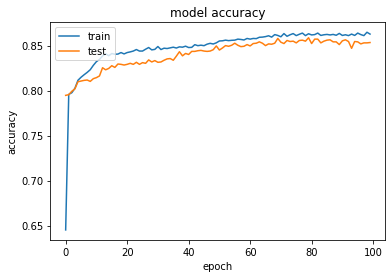

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

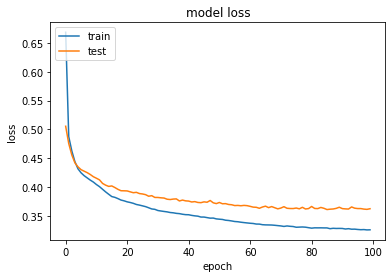

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()